In [1]:
#Process data

#Data Visulization
#Words that occur most using word cloud
#histogram

#Sentiment Analysis and coparison with Spam
#Different Classification models using Grid SearchCV
#Evaluate classification Report

In [49]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix , classification_report
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv('SMSSpamCollection.txt',sep='\t',names=["label","messages"])

In [7]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Visualization

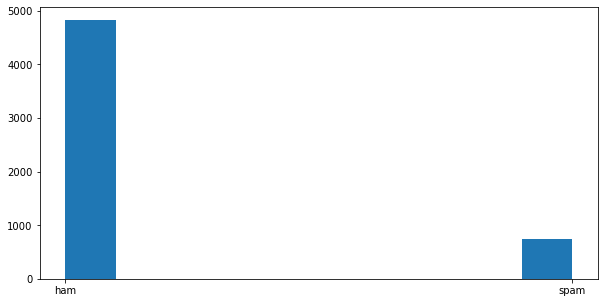

In [33]:
plt.figure(figsize=(10,5))
plt.hist(df.label)
plt.show()

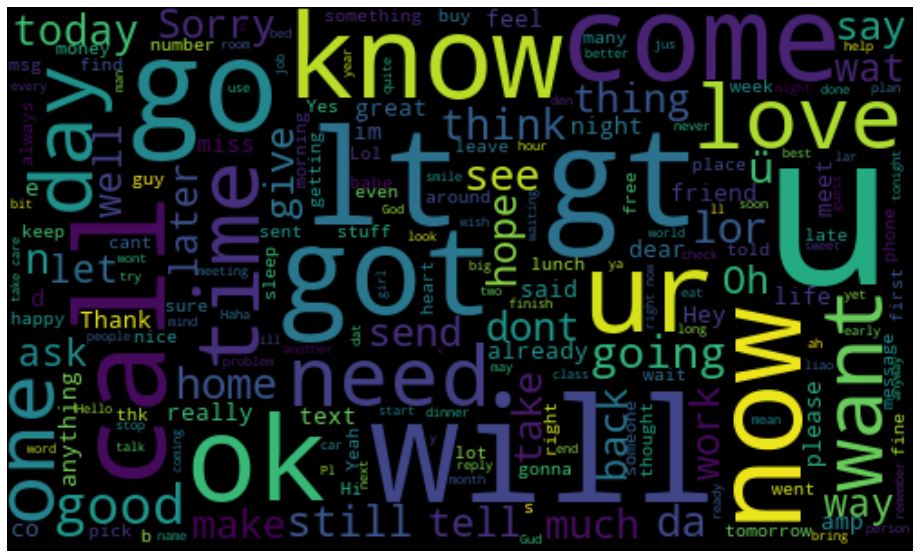

In [35]:
#Ham emails

plt.figure(figsize=(20,10))
words=''.join([corpus for corpus in df[df['label']=='ham']['messages']])
wordCloud=WordCloud(width=500,height=300,random_state=30,max_font_size=120).generate(words)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

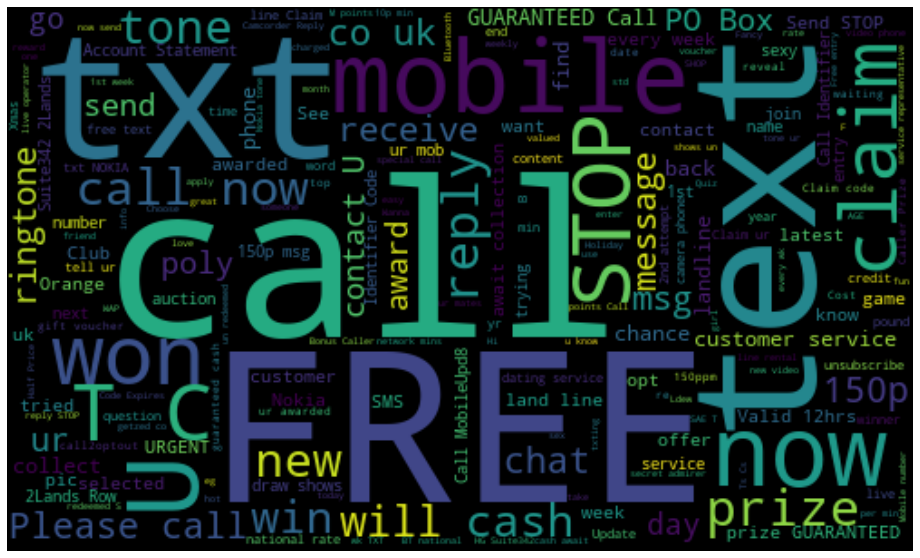

In [36]:
#Spam emails

plt.figure(figsize=(20,10))
words=''.join([corpus for corpus in df[df['label']=='spam']['messages']])
wordCloud=WordCloud(width=500,height=300,random_state=30,max_font_size=120).generate(words)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [89]:
def preprocess(df):
    
    lemmatizer=WordNetLemmatizer()

    corpus=[]
    indexes=df.index
    for i in indexes:
        sen=re.sub('[^a-zA-Z]', ' ', df['messages'][i])
        sen=sen.lower()
        sen=sen.split()

        sen=[lemmatizer.lemmatize(word) for word in sen if  word not in stopwords.words('english')]
        sen=' '.join(sen)
        corpus.append(sen)
    tf=TfidfVectorizer()
    features=tf.fit_transform(corpus)
    
    return features.toarray()

In [90]:
features=preprocess(df)
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
enc=LabelEncoder()
labels=enc.fit_transform(df['label'])
labels

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
# Model Trainning using SVM

X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=10,test_size=0.3)

model=svm.SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9688995215311005

In [51]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1457
           1       1.00      0.76      0.86       215

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



# Ensembling Technique

In [48]:
#Here we can see Data is imbalanced thats why model is overfiited we have to use Ensembling Technique
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [54]:
4825/6

804.1666666666666

In [64]:
# Split Data in 6

data_splits={}

j=0
for i in range(6):
    data_splits[i+1]=df[df['label']=='ham'].iloc[j:747+j]
    j=j+747

In [95]:
def Modelling(df,index):
    df1=pd.concat([data_splits[i],df])
    
#     print(df1)
    features=preprocess(df1)
    
    # Labels
    encoder=LabelEncoder()
    labels=encoder.fit_transform(df1['label'])
    
    # Model Trainning using SVM

    X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=10,test_size=0.3)

    model=svm.SVC()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    print('Score: ',model.score(X_test,y_test))
    
    
    print("Clssification Report\n")
    print(classification_report(y_test,y_pred))
    

In [96]:
Modelling(df[df['label']=='spam'],1)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [97]:
Modelling(df[df['label']=='spam'],2)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [98]:
Modelling(df[df['label']=='spam'],3)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [99]:
Modelling(df[df['label']=='spam'],4)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [100]:
Modelling(df[df['label']=='spam'],5)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [101]:
Modelling(df[df['label']=='spam'],6)

Score:  0.9487750556792873
Clssification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       1.00      0.91      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# HyperParameter Tunning Using GridSearchCV

In [103]:
model_params={
    
    'svm': {
        'model':svm.SVC(gamma='auto'),
        'params':{
          
            'C':[1,5,10,20],
            'kernel':['rbf','linear']
        }
    },
    
    'random_forest':{
        
        'model':RandomForestClassifier(),
        'params': {
            
            'n_estimators':[1,5,10]
        }
    },
    
    'logistic_regression':{
        
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    
    'decision_tree':{
        
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' :['gini', 'entropy'],
             'splitter':['best','random'] 
        }
    },
    
    'gaussian_nb':{
        'model':GaussianNB(),
        'params':{}
        
    },
    
    'multinomial_nb':{
        'model':MultinomialNB(),
        'params':{}
    
    }
}

In [118]:
scores=[]
features=preprocess(df)

# Labels
encoder=LabelEncoder()
labels=encoder.fit_transform(df['label'])
    
for model_name,mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'],cv=3,return_train_score=False)
    clf.fit(features,labels)
    scores.append({
        'model':model_name,
        'params':clf.best_params_,
        'score':clf.best_score_
    })
  



    
description=pd.DataFrame(scores, columns=['model','params','score'])
description
   

# Sentimental Analysis of Emails

In [111]:
df['Polarity']=df.messages.apply(lambda mes:TextBlob(mes).sentiment.polarity)

In [112]:
def getSentimentalAnalysis(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [113]:
df['Analysis']=df.Polarity.apply(getSentimentalAnalysis)

In [114]:
pos=df[df['Analysis']=='Positive']
neg=df[df['Analysis']=='Negative']
neu=df[df['Analysis']=='Neutral']

In [115]:
print('Positive')
pos.label.value_counts()

Positive


ham     2016
spam     431
Name: label, dtype: int64

In [116]:
print('Negative')
neg.label.value_counts()

Negative


ham     742
spam     65
Name: label, dtype: int64

In [117]:
print('Neutral')
neu.label.value_counts()

Neutral


ham     2067
spam     251
Name: label, dtype: int64

In [119]:
df

,label,messages,Polarity,Analysis
0,ham,"Go until jurong point, crazy.. Available only ...",0.150000,Positive
1,ham,Ok lar... Joking wif u oni...,0.500000,Positive
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.300000,Positive
3,ham,U dun say so early hor... U c already then say...,0.100000,Positive
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000,Neutral
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.180556,Positive
5568,ham,Will ü b going to esplanade fr home?,0.000000,Neutral
5569,ham,"Pity, * was in mood for that. So...any other s...",-0.112500,Negative
5570,ham,The guy did some bitching but I acted like i'd...,0.216667,Positive
